In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import plotly.express as px

# Exploratory Data Analysis

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
operating_budget = pd.read_csv('/content/fy25-adopted-operating-budget.csv')
# Detect encoding
with open('/content/fy25-fy29-capital-budget-plan-adopted.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Read file with detected encoding
capital_budget = pd.read_csv('fy25-fy29-capital-budget-plan-adopted.csv', encoding=encoding)
print('Columns of fy25-adopted-operating-budget.csv')
print(operating_budget.columns)
print()
print('Columns of fy25-fy29-capital-budget-plan-adopted.csv')
print(capital_budget.columns)
print(operating_budget.head())
print()
print(capital_budget.head())


Mounted at /content/drive
Columns of fy25-adopted-operating-budget.csv
Index(['Cabinet', 'Dept', 'Program', 'Expense Category', 'FY22 Actual Expense',
       'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'],
      dtype='object')

Columns of fy25-fy29-capital-budget-plan-adopted.csv
Index(['Department', 'Project_Name', 'Scope_Of_Work', 'PM_Department',
       'Project_Status', 'Neighborhood', 'Authorization_Existing',
       'Authorization_FY', 'Authorization_Future', ' Grant_Existing ',
       ' Grant_FY ', ' Grant_Future ', 'GO_Expended', 'Capital_Year_0',
       ' CapitalYear_1 ', 'Capital_Year_25', 'Grant_Expended', 'Grant_Year_0',
       ' Grant_Year_1 ', 'GrantYear_25', 'External_Funds',
       'Total_Project_Budget'],
      dtype='object')
           Cabinet            Dept                 Program  \
0  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
1  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
2  Mayor's Cabinet  Mayor's Office  Mayor's Ad

# Data Cleaning

In [8]:
empty=['#Missing']
print('Missing data by columns of csvs')
print(f'fy25-adopted-operating-budget={operating_budget.apply(lambda col: col.isin(empty).sum())}')
print()
print(f'fy25-fy29-capital-budget-plan-adopted={capital_budget.apply(lambda col: col.isin(empty).sum())}')
print('Replacing Missing values')
operating_budget.replace({'#Missing':0},inplace=True)
operating_budget['FY22 Actual Expense'] = pd.to_numeric(operating_budget['FY22 Actual Expense'], errors='coerce')
operating_budget['FY23 Actual Expense'] = pd.to_numeric(operating_budget['FY23 Actual Expense'], errors='coerce')
operating_budget['FY24 Appropriation'] = pd.to_numeric(operating_budget['FY24 Appropriation'], errors='coerce')
operating_budget['FY25 Budget']=pd.to_numeric(operating_budget['FY25 Budget'], errors='coerce')
import pandas as pd
import glob
import os

def standardize_column_names(df):
    """
    Standardize column names by removing special characters and converting to lowercase.
    """
    # Remove BOM character if present and convert to lowercase
    return df.rename(columns=lambda x: x.replace('ï»¿', '').strip().lower())

def merge_duplicate_columns(df, duplicate_cols):
    """
    Merge duplicate columns by taking the first non-null value across duplicates.
    """
    for col in duplicate_cols:
        # Find all columns that match the duplicate column name
        matching_cols = df.columns[df.columns == col]

        if len(matching_cols) > 1:
            # Combine columns by taking the first non-null value from left to right
            df[col] = df[list(matching_cols)].bfill(axis=1).iloc[:, 0]
            # Drop the duplicate columns, keeping only the first one
            df.drop(columns=list(matching_cols)[1:], inplace=True)
            print(f"Merged columns: {list(matching_cols)} into '{col}'")
    return df

def process_checkbook_files(data_directory):
    """
    Process and combine checkbook CSV files while handling column name inconsistencies.
    """
    # Define file pattern
    file_pattern = os.path.join(data_directory, 'checkbook-explorer-fy*.csv')
    csv_files = glob.glob(file_pattern)

    if not csv_files:
        raise FileNotFoundError(f"No CSV files found matching pattern: {file_pattern}")

    df_list = []

    # Read and standardize each CSV file
    for file in csv_files:
        try:
            # Read the CSV file with 'iso-8859-1' encoding
            temp_df = pd.read_csv(file, encoding='iso-8859-1')
            # Standardize column names immediately upon loading
            temp_df = standardize_column_names(temp_df)

            df_list.append(temp_df)
            print(f"Successfully loaded and standardized {file} with {temp_df.shape[0]} records.")
        except Exception as e:
            print(f"Error loading {file}: {e}")


Missing data by columns of csvs
fy25-adopted-operating-budget=Cabinet                  0
Dept                     0
Program                  0
Expense Category         0
FY22 Actual Expense    183
FY23 Actual Expense    138
FY24 Appropriation     129
FY25 Budget             94
dtype: int64

fy25-fy29-capital-budget-plan-adopted=Department                0
Project_Name              0
Scope_Of_Work             0
PM_Department             0
Project_Status            0
Neighborhood              0
Authorization_Existing    0
Authorization_FY          0
Authorization_Future      0
 Grant_Existing           0
 Grant_FY                 0
 Grant_Future             0
GO_Expended               0
Capital_Year_0            0
 CapitalYear_1            0
Capital_Year_25           0
Grant_Expended            0
Grant_Year_0              0
 Grant_Year_1             0
GrantYear_25              0
External_Funds            0
Total_Project_Budget      0
dtype: int64
Replacing Missing values


# Exploratory Data Analysis Of The Operating Expenses

Total Spending FY22: $3,838,631,715.66
Total Spending FY23: $4,059,689,437.60
Total Spending FY24: $4,292,164,103.10
Total Budget FY25: $4,636,924,670.23
Percentage Growth from FY22 to FY23: 5.76%
Percentage Growth from FY23 to FY24: 5.73%
Percentage Growth from FY24 to FY25: 8.03%
Average Growth Across All Programs: 6.51%

                      Program  Total Spending FY22-FY24
171                  Pensions              1.096199e+09
30                BPS Finance              8.462572e+08
31             BPS Operations              8.401213e+08
54     Charter School Tuition              7.626922e+08
33    Boston Fire Suppression              6.684350e+08
109          Health Insurance              6.404936e+08
44   Bureau of Field Services              6.290296e+08
69               Debt Service              6.288747e+08
125                       K-8              6.111756e+08
81                 Elementary              5.092038e+08


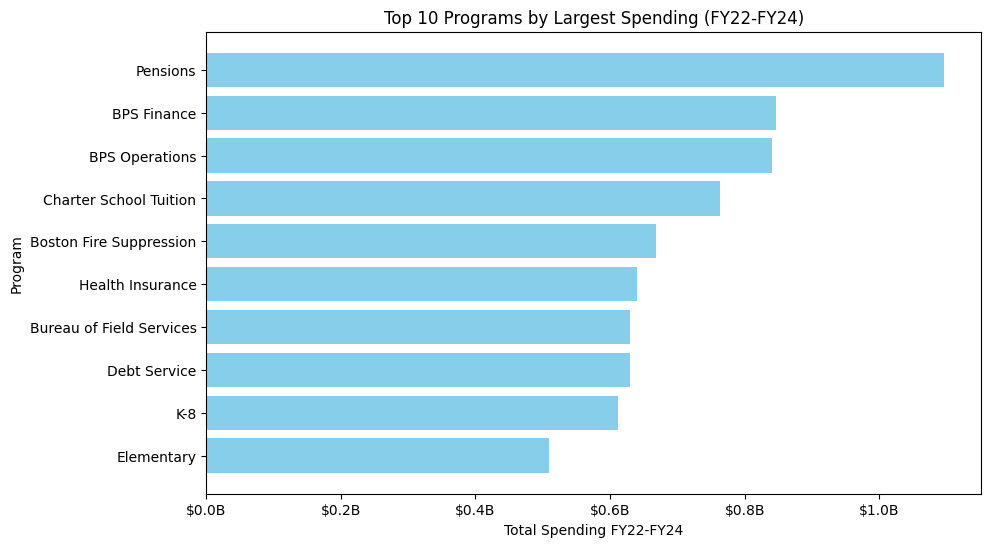

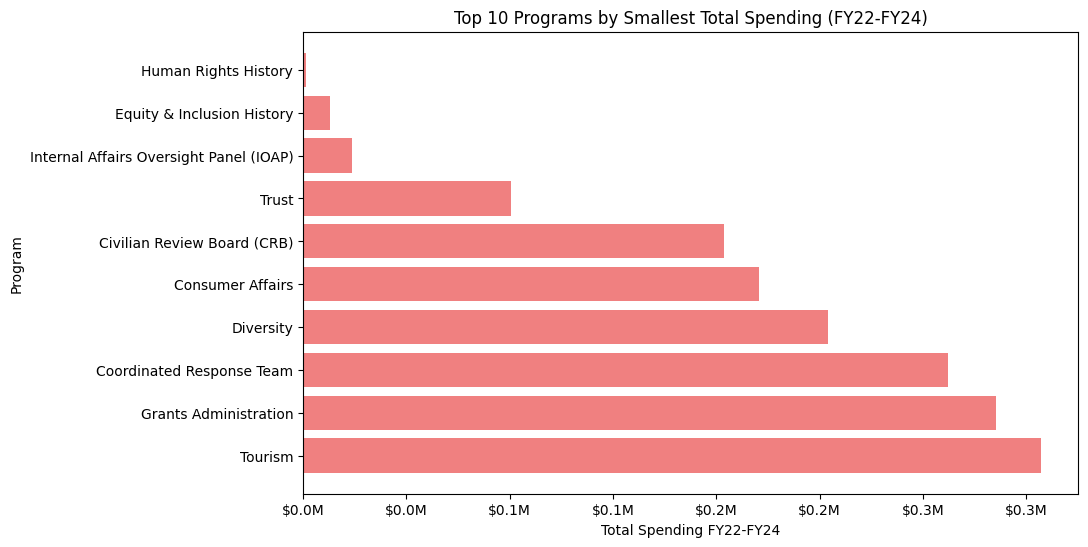

<ipython-input-10-2707d7fdd2d8>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_per_year_nonzero['Percentage Growth (FY22-FY24)'] = (


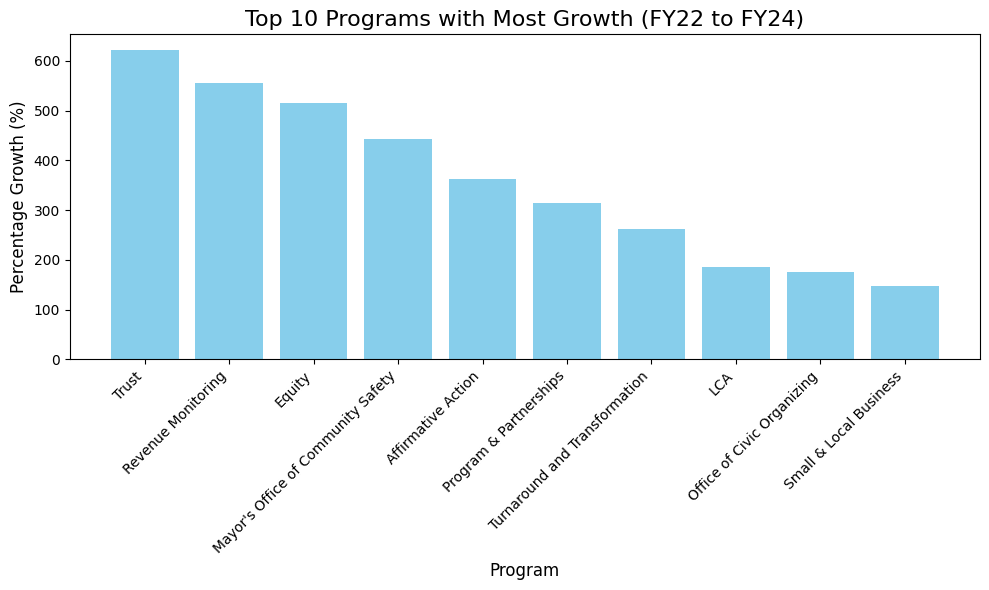

<ipython-input-10-2707d7fdd2d8>:112: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_aggregated['Spending'].replace(0, pd.NA, inplace=True)


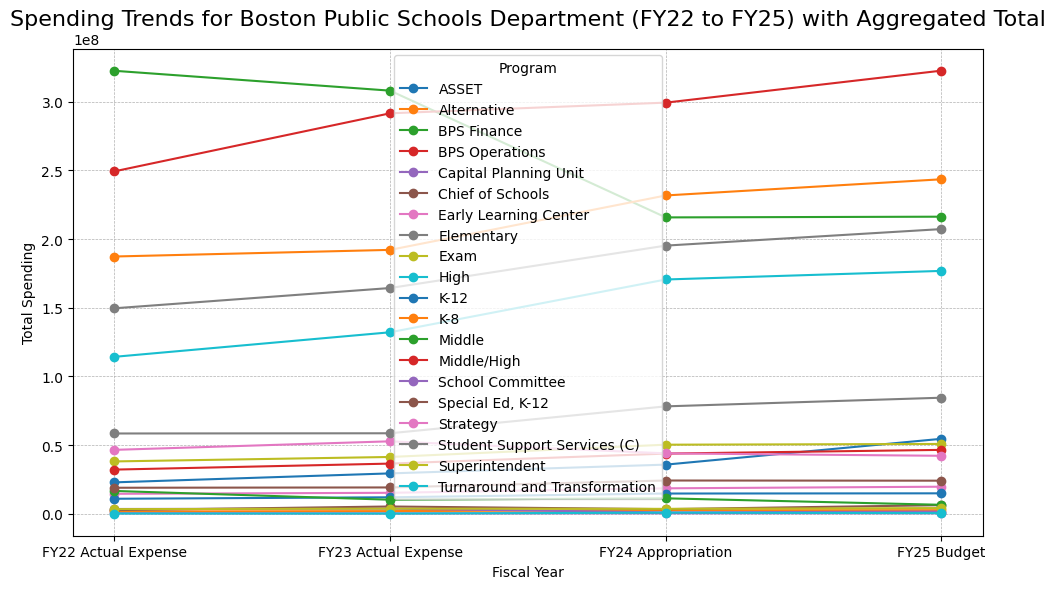

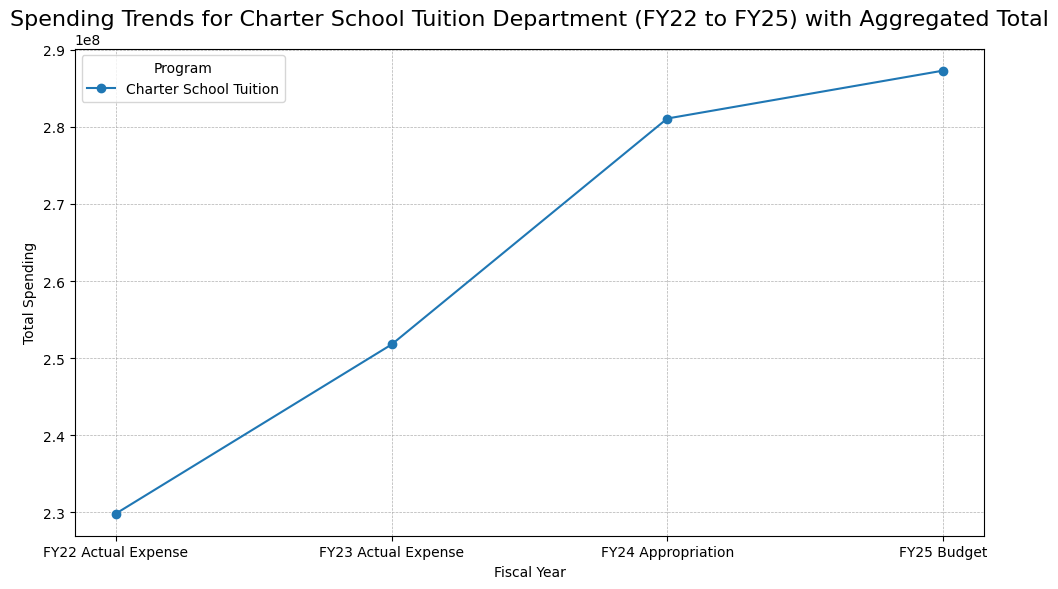

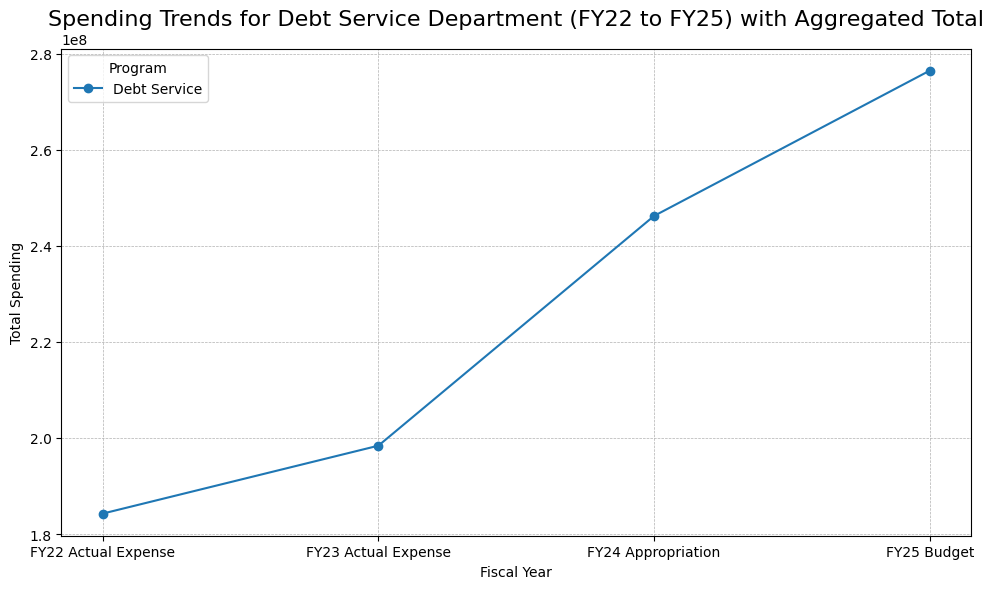

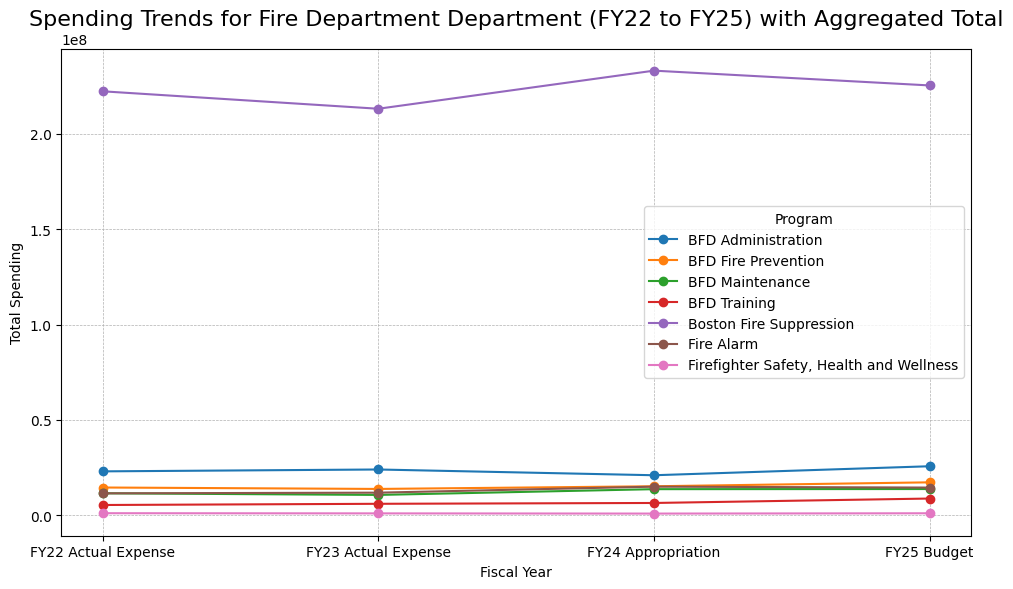

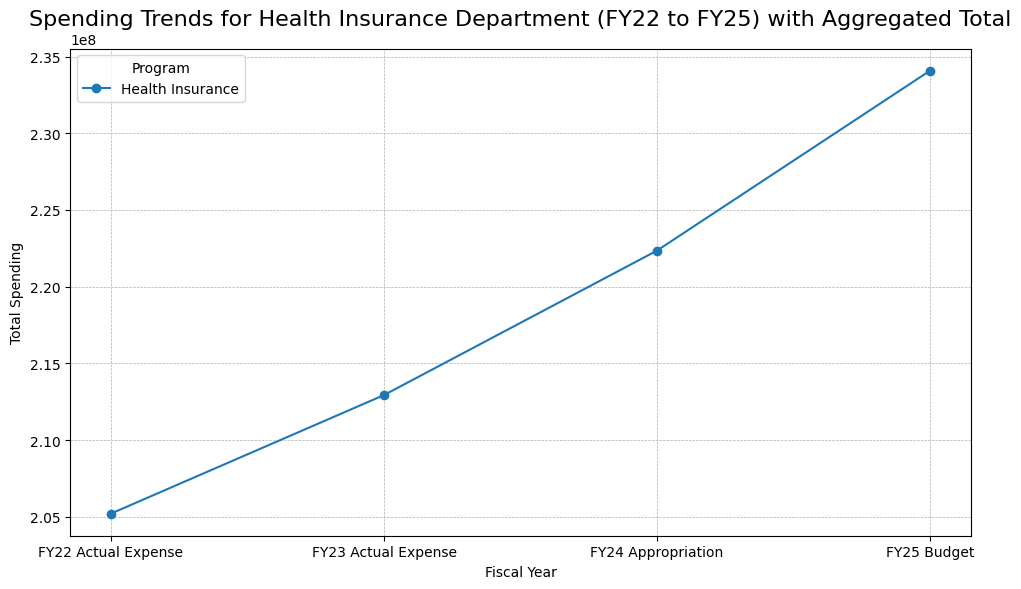

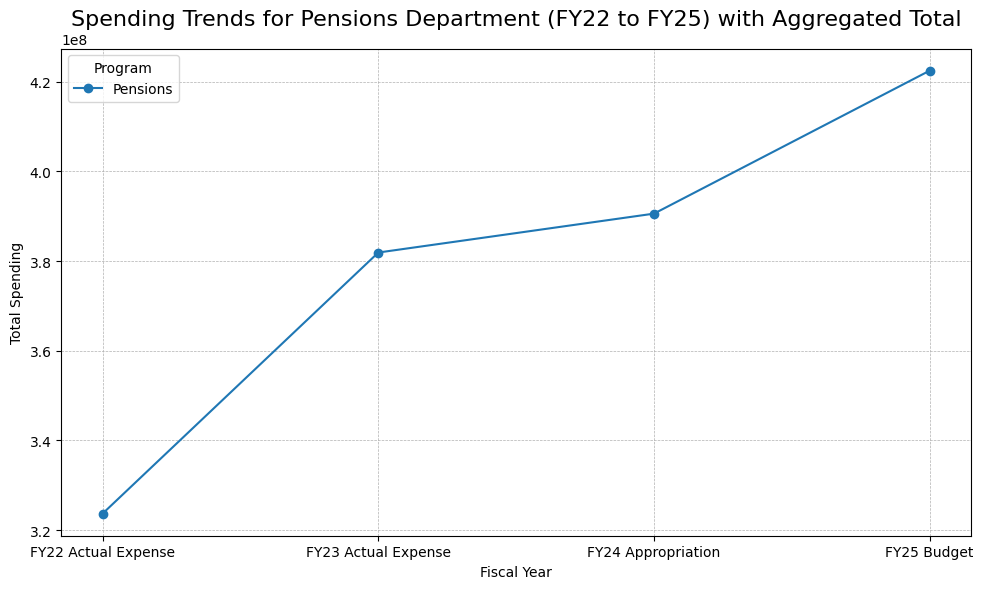

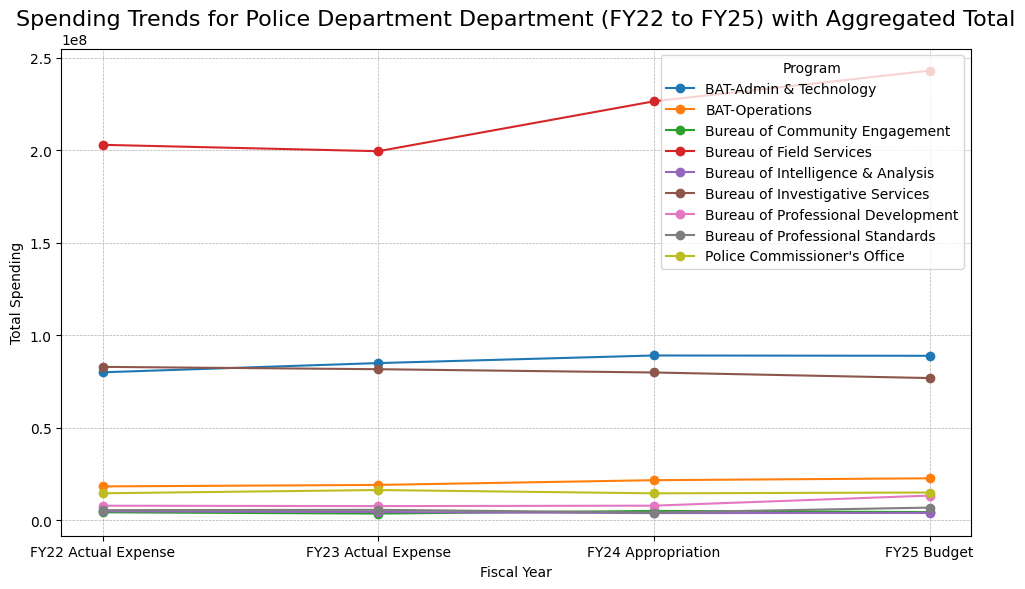

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

# Calculate total spending for each fiscal year
total_fy22 = operating_budget['FY22 Actual Expense'].sum()
total_fy23 = operating_budget['FY23 Actual Expense'].sum()
total_fy24 = operating_budget['FY24 Appropriation'].sum()
total_budget_25 = operating_budget['FY25 Budget'].sum()

# Calculate percentage growth between fiscal years
growth_fy22_fy23 = ((total_fy23 - total_fy22) / total_fy22) * 100
growth_fy23_fy24 = ((total_fy24 - total_fy23) / total_fy23) * 100
growth_fy24_fy25 = ((total_budget_25 - total_fy24) / total_fy24) * 100

# Calculate average growth across fiscal years
average_growth = (growth_fy22_fy23 + growth_fy23_fy24 + growth_fy24_fy25) / 3

# Display results
print(f"Total Spending FY22: ${total_fy22:,.2f}")
print(f"Total Spending FY23: ${total_fy23:,.2f}")
print(f"Total Spending FY24: ${total_fy24:,.2f}")
print(f"Total Budget FY25: ${total_budget_25:,.2f}")
print(f"Percentage Growth from FY22 to FY23: {growth_fy22_fy23:.2f}%")
print(f"Percentage Growth from FY23 to FY24: {growth_fy23_fy24:.2f}%")
print(f"Percentage Growth from FY24 to FY25: {growth_fy24_fy25:.2f}%")
print(f"Average Growth Across All Programs: {average_growth:.2f}%\n")

# Calculate total spending per program for FY22-FY24
operating_budget['Total Spending FY22-FY24'] = (
    operating_budget['FY22 Actual Expense'] +
    operating_budget['FY23 Actual Expense'] +
    operating_budget['FY24 Appropriation']
)
total_spending_per_program = operating_budget.groupby('Program')['Total Spending FY22-FY24'].sum().reset_index()

# Display top 10 programs by largest spending (FY22-FY24)
top_10_spenders = total_spending_per_program.nlargest(10, 'Total Spending FY22-FY24')
print(top_10_spenders)

# Plotting top 10 programs by spending
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'

plt.figure(figsize=(10, 6))
plt.barh(top_10_spenders['Program'], top_10_spenders['Total Spending FY22-FY24'], color='skyblue')
plt.xlabel('Total Spending FY22-FY24')
plt.ylabel('Program')
plt.title('Top 10 Programs by Largest Spending (FY22-FY24)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions))
plt.gca().invert_yaxis()
plt.show()

# Remove programs with zero total spending and find the 10 smallest spenders
total_spending_per_program = total_spending_per_program[total_spending_per_program['Total Spending FY22-FY24'] != 0]
smallest_10_spenders = total_spending_per_program.nsmallest(10, 'Total Spending FY22-FY24')

# Plotting smallest 10 programs by spending
def millions(x, pos):
    return f'${x * 1e-6:.1f}M'

plt.figure(figsize=(10, 6))
plt.barh(smallest_10_spenders['Program'], smallest_10_spenders['Total Spending FY22-FY24'], color='lightcoral')
plt.xlabel('Total Spending FY22-FY24')
plt.ylabel('Program')
plt.title('Top 10 Programs by Smallest Total Spending (FY22-FY24)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().invert_yaxis()
plt.show()

# Calculate and display programs with highest percentage growth from FY22 to FY24
spending_per_year = operating_budget.groupby('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation']].sum().reset_index()
spending_per_year['Absolute Growth (FY22-FY24)'] = spending_per_year['FY24 Appropriation'] - spending_per_year['FY22 Actual Expense']
spending_per_year_nonzero = spending_per_year[spending_per_year['FY22 Actual Expense'] > 0]
spending_per_year_nonzero['Percentage Growth (FY22-FY24)'] = (
    (spending_per_year_nonzero['Absolute Growth (FY22-FY24)'] / spending_per_year_nonzero['FY22 Actual Expense']) * 100
)
most_growth_programs = spending_per_year_nonzero.nlargest(10, 'Percentage Growth (FY22-FY24)')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    most_growth_programs['Program'],
    most_growth_programs['Percentage Growth (FY22-FY24)'],
    color='skyblue'
)

# Set titles and labels
plt.title('Top 10 Programs with Most Growth (FY22 to FY24)', fontsize=16)
plt.xlabel('Program', fontsize=12)
plt.ylabel('Percentage Growth (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate program names for readability
plt.tight_layout()
plt.show()

# List of specified departments, particularly department with top 10 spending
selected_departments = [
    'Boston Public Schools', 'Charter School Tuition', 'Pensions', 'Debt Service',
    'Fire Department', 'Health Insurance',
    'Boston Fire Department', 'Police Department'
]

df_spending = operating_budget[['Dept', 'Program', 'FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']]
df_spending_long = df_spending.melt(
    id_vars=['Dept', 'Program'],
    value_vars=['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'],
    var_name='Fiscal Year',
    value_name='Spending'
)
df_aggregated = df_spending_long.groupby(['Dept', 'Program', 'Fiscal Year'], as_index=False).agg({'Spending': 'sum'})
df_aggregated['Spending'].replace(0, pd.NA, inplace=True)
df_aggregated.dropna(subset=['Spending'], inplace=True)

# Filter the DataFrame for the selected departments
df_selected = df_aggregated[df_aggregated['Dept'].isin(selected_departments)]

# Loop through each selected department and create a line plot
for department in df_selected['Dept'].unique():
    df_department = df_selected[df_selected['Dept'] == department]
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    plt.title(f'Spending Trends for {department} Department (FY22 to FY25) with Aggregated Total', fontsize=16)
    plt.xlabel('Fiscal Year')
    plt.ylabel('Total Spending')

    # Plot each program within the department
    for program in df_department['Program'].unique():
        df_program = df_department[df_department['Program'] == program]
        plt.plot(
            df_program['Fiscal Year'],
            df_program['Spending'],
            marker='o',
            label=program
        )

    # Customize and display the plot
    plt.legend(title='Program')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

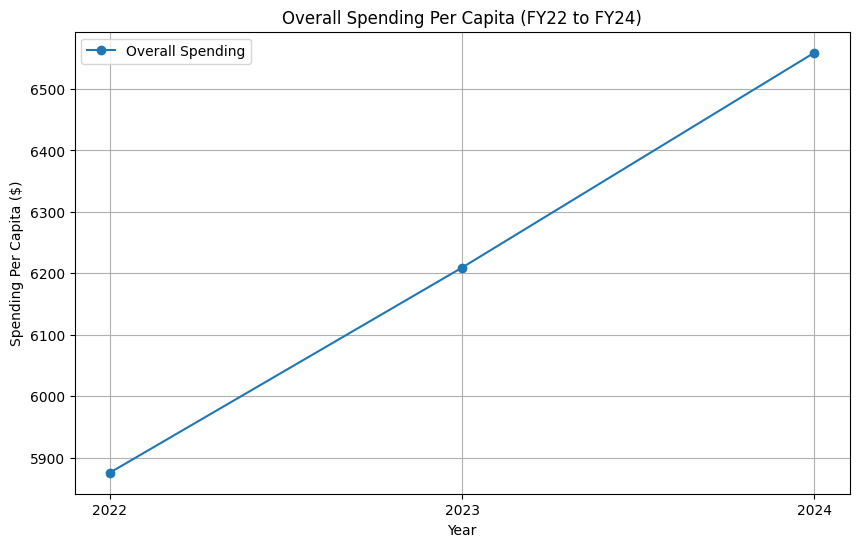

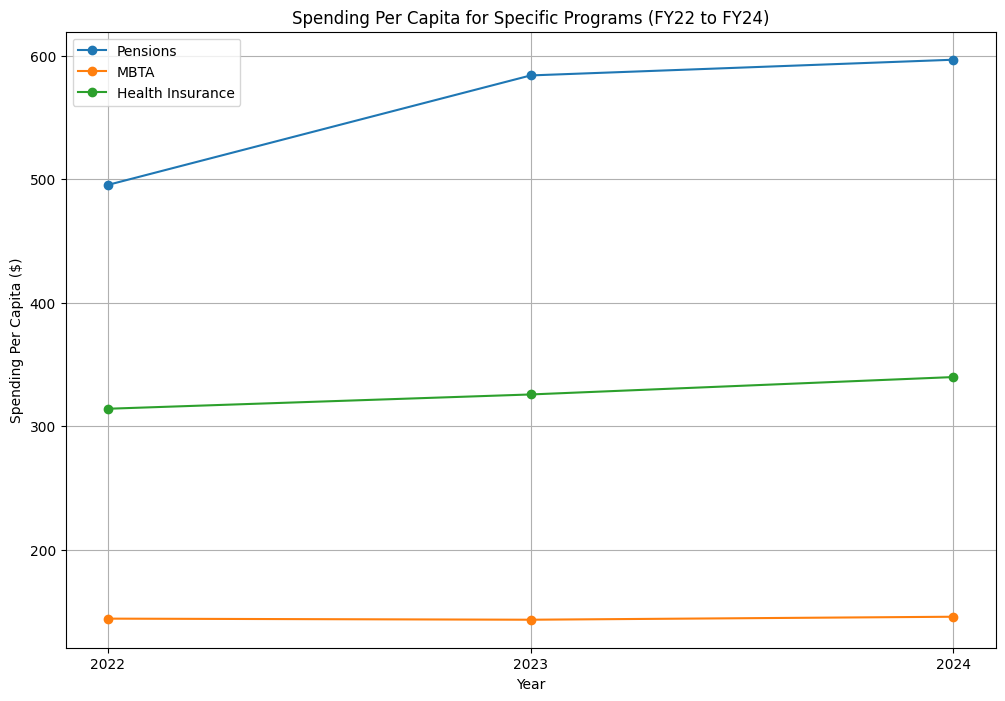

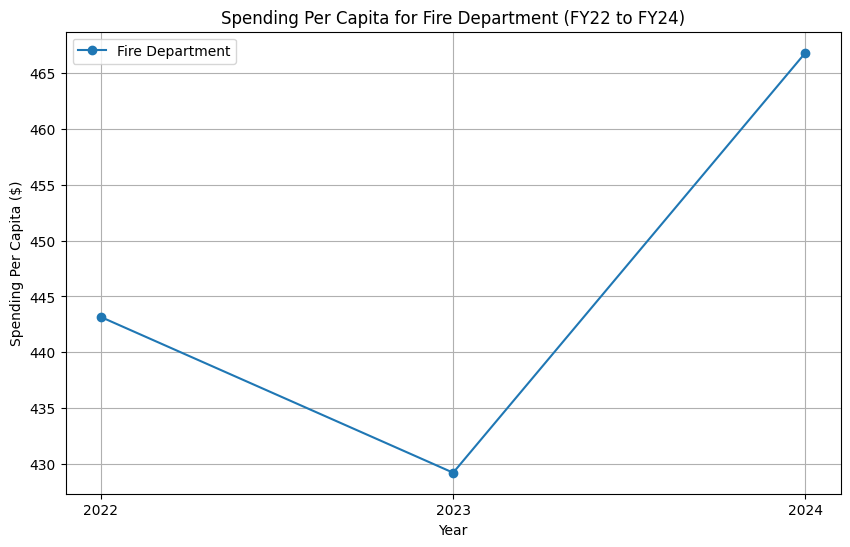

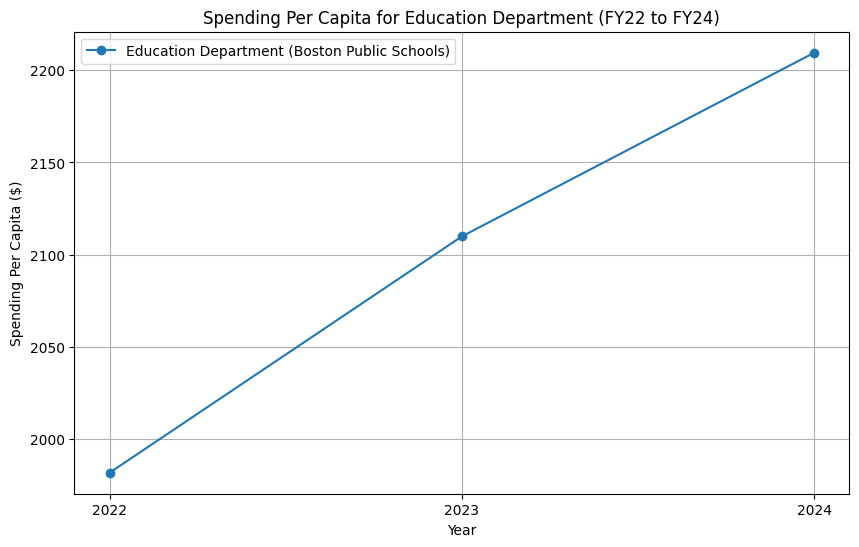

In [11]:
import matplotlib.pyplot as plt

# Define years and population
years = ['2022', '2023', '2024']
population = [653300, 653800, 654400]

# Calculate total spending per capita for each year across all programs
total_spending = [operating_budget['FY22 Actual Expense'].sum(),
                  operating_budget['FY23 Actual Expense'].sum(),
                  operating_budget['FY24 Appropriation'].sum()]
per_capita_spending = [total_spending[i] / population[i] for i in range(3)]

# Plot overall per capita spending for all programs
plt.figure(figsize=(10, 6))
plt.plot(years, per_capita_spending, marker='o', label="Overall Spending")
plt.title("Overall Spending Per Capita (FY22 to FY24)")
plt.xlabel("Year")
plt.ylabel("Spending Per Capita ($)")
plt.grid()
plt.legend()
plt.show()

# Function to calculate and plot per capita spending for a specific program
def plot_per_capita(program_name, population_data):
    program_data = operating_budget[operating_budget['Program'] == program_name]
    program_summary = program_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation']].sum()
    per_capita_spending = [program_summary[year] / population_data[i] for i, year in enumerate(['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation'])]

    plt.plot(years, per_capita_spending, marker='o', label=program_name)

# Plot per capita spending for specific programs
plt.figure(figsize=(12, 8))
plot_per_capita("Pensions", population)
plot_per_capita("MBTA", population)
plot_per_capita("Health Insurance", population)
plt.title("Spending Per Capita for Specific Programs (FY22 to FY24)")
plt.xlabel("Year")
plt.ylabel("Spending Per Capita ($)")
plt.legend()
plt.grid()
plt.show()

# Plot per capita spending for Fire Department
fire_department_data = operating_budget[operating_budget['Dept'] == 'Fire Department']
fire_department_summary = fire_department_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation']].sum()
fire_per_capita_spending = [fire_department_summary[year] / population[i] for i, year in enumerate(['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation'])]

plt.figure(figsize=(10, 6))
plt.plot(years, fire_per_capita_spending, marker='o', label="Fire Department")
plt.title("Spending Per Capita for Fire Department (FY22 to FY24)")
plt.xlabel("Year")
plt.ylabel("Spending Per Capita ($)")
plt.legend()
plt.grid()
plt.show()


# Plot per capita spending for Education Department (Boston Public Schools)
school_data = operating_budget[operating_budget['Dept'] == 'Boston Public Schools']
school_summary = school_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation']].sum()
school_per_capita_spending = [school_summary[year] / population[i] for i, year in enumerate(['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation'])]

plt.figure(figsize=(10, 6))
plt.plot(years, school_per_capita_spending, marker='o', label="Education Department (Boston Public Schools)")
plt.title("Spending Per Capita for Education Department (FY22 to FY24)")
plt.xlabel("Year")
plt.ylabel("Spending Per Capita ($)")
plt.legend()
plt.grid()
plt.show()
